In [4]:
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [5]:
#setting the path
os.chdir("C:/Users/ariam/Google Drive/Formation-energy1/New folder/workshop")
print(os.getcwd())

C:\Users\ariam\Google Drive\Formation-energy1\New folder\workshop


In [6]:
# variables.csv corresponds to the feature set created based on compositional data
# cubic-hex-y.csv corresponds to the labels, 0 as cubic and 1 as hexagonal structure
PE = pd.read_csv('variables.csv')
Y_PE = pd.read_csv('cubic-hex-y.csv')

In [7]:
data = PE.values
data.data.shape

(693, 80)

In [8]:
labels = Y_PE.values
labels = np.ravel(labels)
labels.data.shape

(693,)

In [9]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.8, test_size=0.2, random_state=50, shuffle=True, stratify=labels)

In [28]:
#xn_train corresponds to unnormalized dataset
Xn_train=X_train
yn_train=y_train

In [29]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
normalizer = preprocessing.Normalizer().fit(X_train)
normalizer
X_train=normalizer.transform(X_train)
X_test=normalizer.transform(X_test)

In [12]:
#rbf support vector classification
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,10,32,100], 'gamma': [0.001,0.01,1]}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)
grid.score(X_test, y_test)


{'C': 10, 'gamma': 1}


0.87050359712230219

In [13]:
#rbf svc, for unnormalized data
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,10,32,100], 'gamma': [0.001,0.01,1]}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(Xn_train, yn_train)
print(grid.best_params_)
grid.score(X_test, y_test)

{'C': 0.1, 'gamma': 0.001}


0.74820143884892087

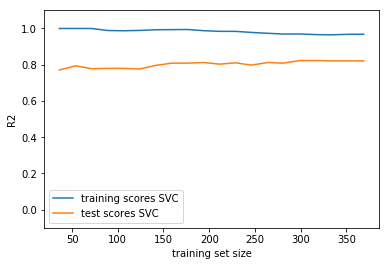

In [14]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(0.1, 1, 20,100))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '-', label = "training scores " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name)
    plt.xlabel('training set size')
    plt.ylabel('R2')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)
plt.figure()
plot_learning_curve(SVC(C=10,gamma=1), X_train, y_train)

In [15]:
C_range = np.logspace(-1, 2, 15)
gamma_range = np.logspace(-2, 2, 10)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([  1.00000e-02,   2.78256e-02,   7.74264e-02,   2.15443e-01,
         5.99484e-01,   1.66810e+00,   4.64159e+00,   1.29155e+01,
         3.59381e+01,   1.00000e+02]), 'C': array([   0.1    ,    0.16379,    0.26827,    0.4394 ,    0.71969,
          1.17877,    1.9307 ,    3.16228,    5.17947,    8.48343,
         13.89495,   22.75846,   37.27594,   61.05402,  100.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

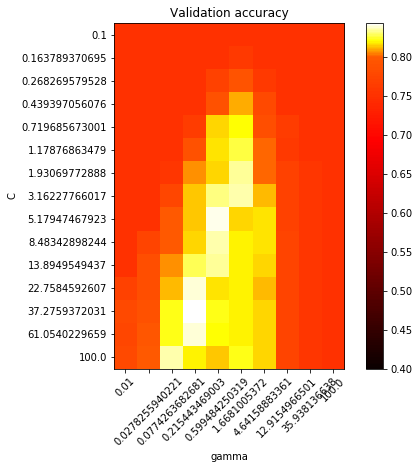

In [17]:
# Visualization
#
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.4, midpoint=0.80))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

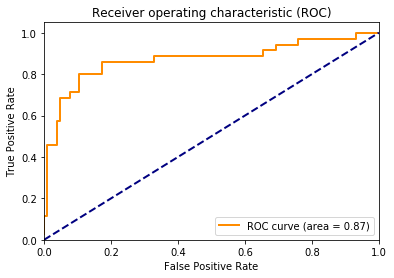

In [31]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import roc_curve, auc
classifier = svm.SVC(probability=True, C=10, gamma=1)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test[:,], y_score[:,])
roc_auc = auc(fpr, tpr)

# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

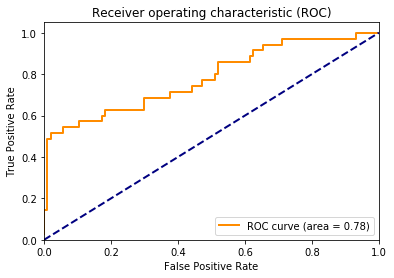

In [30]:
# Learn to predict each class against the other
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import roc_curve, auc
classifier = svm.SVC(probability=True, C=1, gamma=0.001)
y_score = classifier.fit(Xn_train, yn_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test[:,], y_score[:,])
roc_auc = auc(fpr, tpr)

# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()